# はじめに

ここでは、SDRモニターでHDR表示を行うためのLUTを作成する。

最終目的は Davinci Resolve のHDRビデオモニターとして EIZO製 EV2736 を使えるようにすること。

# 理論

HDR動画といってもガンマカーブと色域が違うだけなので、SDRのガンマと色域に変換してあげれば良い。
やり方は大きく分けて2つある。ただし、これは考え方が異なるだけであり理論上は最終的結果が同一になる(たぶん)。

1. コンテンツ補整方式(HDR動画をSDR動画(高輝度)に変換)
2. モニター補整方式(SDRモニターをHDRモニターっぽく変換)

# 設計

手書きで適当に作成。

| コンテンツ補整方式 | モニター補整方式 |
|:----:|:----:|
|![コンテンツ補整](./figure/contents_adjust.jpg)|![モニター補整](./figure/monitor_adjust.jpg)|

# 今回の実装はどっちの方式？

後々の汎用性を考えると 1. が良さそう。

という訳で **コンテンツ補整方式** で実装する。

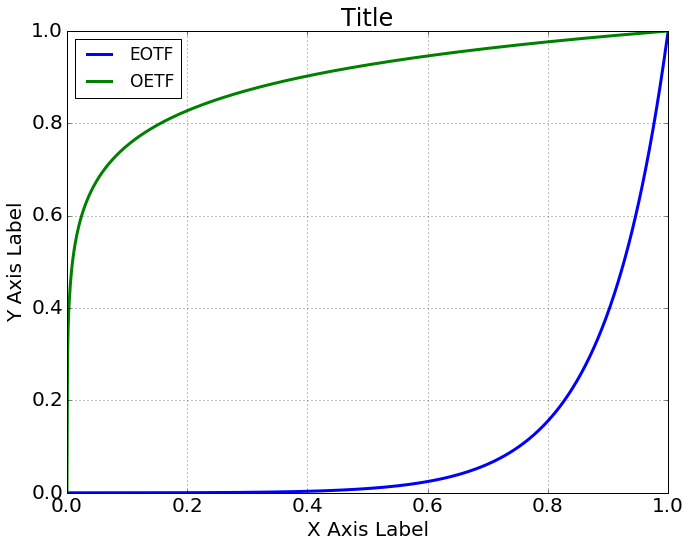

In [5]:
# ST2084 のカーブ確認
import imp
import hdr_on_sdr as hos
imp.reload(hos)
%matplotlib inline
hos.st2084_test()

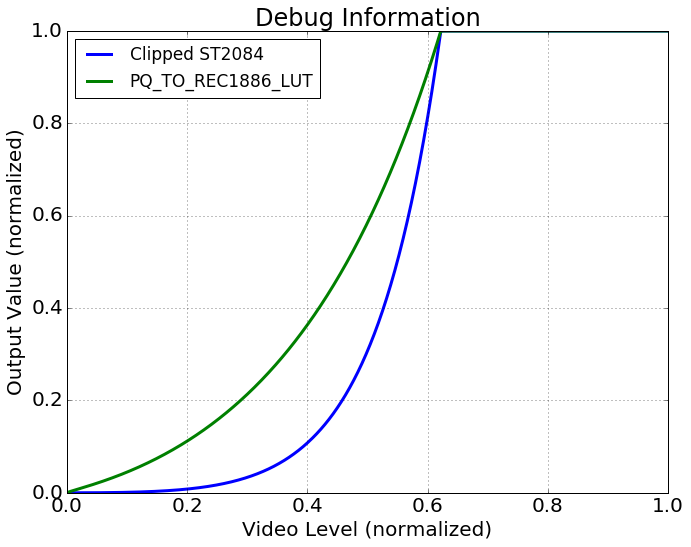

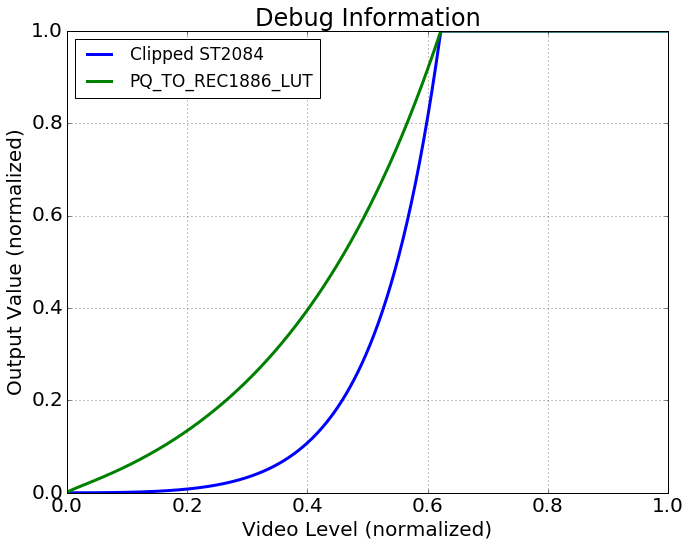

array([ 0.        ,  0.00137181,  0.00223985, ...,  1.        ,
        1.        ,  1.        ])

In [2]:
# LUT作成
import imp
import hdr_on_sdr as hos
imp.reload(hos)
%matplotlib inline
hos.gen_pq_to_sdr_lut(target_bright=300, sdr_gamma=2.2, plot=True)
hos.gen_pq_to_sdr_lut(target_bright=300, sdr_gamma=2.4, plot=True)

In [3]:
# cube 形式で出力
import imp
import hdr_on_sdr as hos
imp.reload(hos)
%matplotlib inline
gamma_list = [2.2, 2.4, 2.6]
bright_list = [300, 1000, 4000]
for gamma in gamma_list:
    for bright in bright_list:
        fname = "./data/PQ{}_TO_Gamma{}.cube".format(bright, gamma)
        lut = hos.gen_pq_to_sdr_lut(target_bright=bright, sdr_gamma=gamma)
        hos.out_1dlut_cube(lut, filename=fname)

In [2]:
# やっぱり3DLUTも作成する
import imp
import hdr_on_sdr as hos
imp.reload(hos)
%matplotlib inline
gamma_list = [2.2, 2.4, 2.6]
bright_list = [300, 1000, 4000]
for gamma in gamma_list:
    for bright in bright_list:
        fname = "./data/PQ{}_REC2020_TO_Gamma{}_REC709.cube".format(bright, gamma)
        lut = hos.gen_pq2020_to_sdr_3dlut(target_bright=bright, sdr_gamma=gamma)
        hos.out_3dlut_cube(lut, target_bright=bright, sdr_gamma=gamma, filename=fname)